### Load example data (from CSL-SHARE database)

In [1]:
import utils

train_data, y_train, test_data, y_test = utils.get_train_test_data()

print("# Train : ", len(train_data))
print("# Test  : ", len(test_data))
print("Class Labels : ", set(y_train))

# Train :  2095
# Test  :  655
Class Labels :  {'sit-to-stand', 'stand-to-sit', 'walk', 'walk-curve-right', 'walk-curve-left', 'stand', 'sit'}


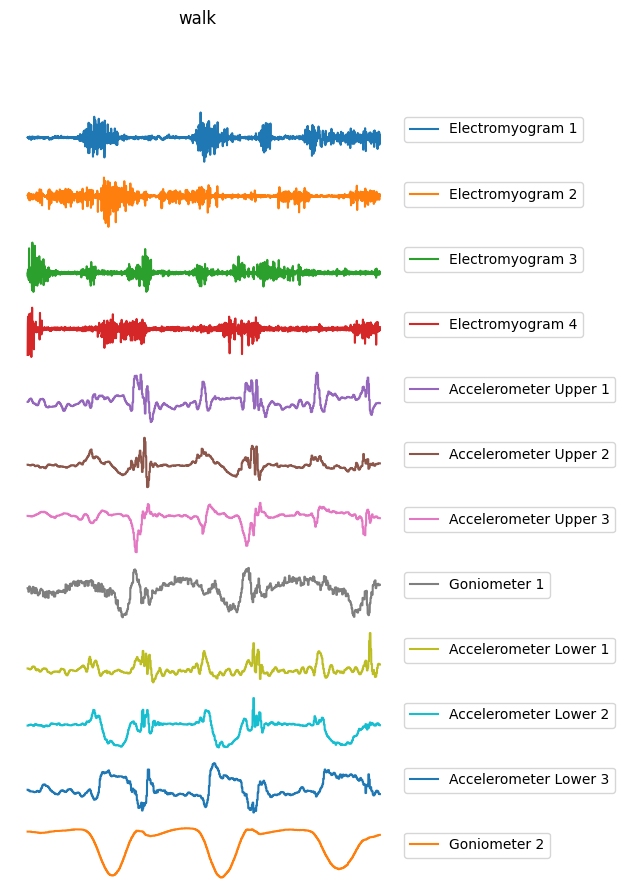

In [2]:
sample, label = utils.plot_random_sample_by_class(train_data, y_train, "walk", ylim=False)


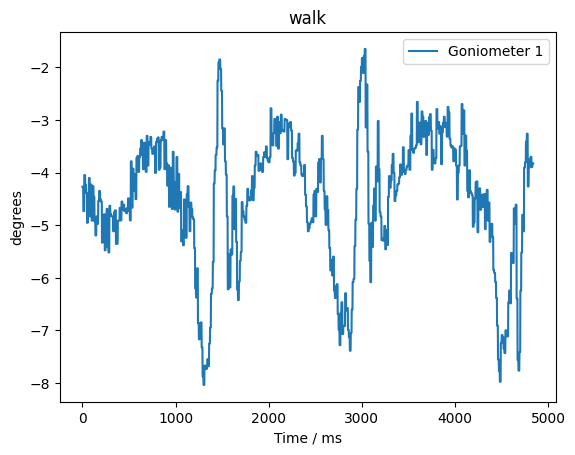

In [3]:
utils.plot_sensor_data(sample, label, "Goniometer 1")

### Feature Extraction with TSFEL

In [4]:
import tsfel

# Create configuration file with statistical features

# Extract train and test features 
fs = 1000


### Classification with TSFEL

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

# Remove correlated features


# Classification using extracted features from tsfel
clf = RandomForestClassifier(max_depth=5, random_state=1)

